In [52]:
import cv2
import tensorflow as tf
from tensorflow import keras as K 
import numpy as np
import matplotlib.pyplot as plt
from imageai.Detection import ObjectDetection
import os
from io import StringIO
import open3d as o3d

In [2]:
detector=ObjectDetection()
detector.setModelTypeAsYOLOv3()

In [4]:
detector.setModelPath(r"C:/Users/ARYAN JAIN/Downloads/yolo.h5")
detector.loadModel()
custom = detector.CustomObjects(sports_ball=True, microwave=True)
fx = 942.8          
baseline = 54.8     
disparities = 128   
block = 31 
units = 0.001

In [6]:
detections = detector.detectCustomObjectsFromImage(custom_objects=custom,
                                                   input_image=r"C:/Users/ARYAN JAIN/Desktop/test.png",
                                                   output_image_path=r"C:/Users/ARYAN JAIN/Desktop/test23.png",
                                                   minimum_percentage_probability=30)

for i in detections:
    print(i["name"] , i["box_points"])

C:\Users\ARYAN JAIN\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 'detectCustomObjectsFromImage()' function has been deprecated and will be removed in future versions of ImageAI. 
 Kindly use 'detectObjectsFromImage()' 
  after removing the cwd from sys.path.


microwave [750, 196, 1278, 671]
sports ball [297, 344, 474, 486]
sports ball [285, 371, 346, 462]
sports ball [68, 404, 168, 494]


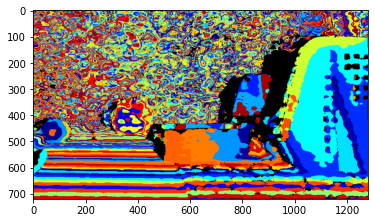

In [8]:
dis=cv2.imread(r"C:/Users/ARYAN JAIN/Desktop/testdisp.png")
inp=cv2.imread(r"C:/Users/ARYAN JAIN/Desktop/test.png")

dis=dis.astype(np.float32)/16.0
disparity=np.zeros((720,1280)).astype(np.float32)

for i in range(0,disparity.shape[0]):
    for j in range(disparity.shape[1]):
        disparity[i][j]=dis[i][j][0]

disp2=disparity
depth = np.zeros(shape=disparity.shape).astype(float)
depth[disparity > 0] = (fx * baseline) / (units * disparity[disparity > 0])
valid_pixels = disparity > 0

depth = np.zeros(shape=disparity.shape).astype("uint8")
depth[valid_pixels] = (fx * baseline) / (units * disparity[valid_pixels])

depth = cv2.equalizeHist(depth)
colorized_depth = np.zeros((inp.shape[0], inp.shape[1], 3), dtype="uint8")
temp = cv2.applyColorMap(depth, cv2.COLORMAP_JET)
colorized_depth[valid_pixels] = temp[valid_pixels]
plt.imshow(colorized_depth)
plt.show()

In [55]:
a=depth[233,1014]
b=depth[415, 344]
x=cv2.imread(r"C:/Users/ARYAN JAIN/Desktop/test.png")

cv2.rectangle(x, (750, 196), (1278, 671), (255,0,0), 2)
cv2.putText(x, "Box", (750, 146), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
cv2.putText(x, "Depth: "+str(a)+" mm", (750, 160), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

cv2.rectangle(x, (297, 344), (474, 486), (255,0,0), 2)
cv2.putText(x, "Ball", (297, 300), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)
cv2.putText(x, "Depth: "+str(b)+" mm", (297, 320), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

cv2.imshow("f", x)
cv2.waitKey()
cv2.destroyAllWindows()

In [50]:
w,h=disparity.shape[:2]
Q = np.float32([[1,  0,  0, -w/2],
                [0, 1,  0, -h/2],
                [0,  0,  0, fx],
                [0,  0,  -0.45, 0]])
#disparity=disparity.astype(np.float32)/16.0
disparity=disp2
points=cv2.reprojectImageTo3D(disparity, Q)

In [56]:
a,b,c=points[233,1014]
distance1=(a**2+b**2+c**2)**0.5
cv2.putText(x, "Distance: "+str(distance1)+" mm", (750, 180), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

a,b,c=points[415, 344]
distance2=(a**2+b**2+c**2)**0.5
cv2.putText(x, "Distance: "+str(distance2)+" mm", (297, 335), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0), 2)

cv2.imwrite("C:/Users/ARYAN JAIN/Desktop/output1.jpg", x)
cv2.imshow("f", x)
cv2.waitKey()
cv2.destroyAllWindows()

In [47]:
ply_header = '''ply
format ascii 1.0
element vertex %(vert_num)d
property float x
property float y
property float z
property uchar red
property uchar green
property uchar blue
end_header
'''

In [48]:
def write_ply(fn, verts, colors):
    verts = verts.reshape(-1, 3)
    colors = colors.reshape(-1, 3)
    verts = np.hstack([verts, colors])
    with open(fn, 'w') as f:
        f.write(ply_header % dict(vert_num=len(verts)))
        np.savetxt(f, verts, '%f %f %f %d %d %d')

colors = cv2.cvtColor(inp, cv2.COLOR_BGR2RGB)
cv2.imshow("kk", colors)
cv2.waitKey()
cv2.destroyAllWindows()
mask = disparity > disparity.min()
out_points = points[mask]
out_colors = colors[mask]
out_fn = 'out2.ply'
write_ply('out2.ply', out_points, out_colors)

In [53]:
pcd = o3d.io.read_point_cloud("C:/Users/ARYAN JAIN/out2.ply")

In [54]:
print(pcd)
print(np.asarray(pcd.points))
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.3412,
                                  front=[0.4257, -0.2125, -0.8795],
                                  lookat=[2.6172, 2.0475, 1.532],
                                  up=[-0.0694, -0.9768, 0.2024])

PointCloud with 842358 points.
[[   82.58065    146.810043  -216.269531]
 [   82.351257   146.810043  -216.269531]
 [   83.195351   148.729126  -219.096588]
 ...
 [-1716.023438  -147.836258 -1764.304077]
 [-1717.894775  -147.836258 -1764.304077]
 [-1719.766113  -147.836258 -1764.304077]]
